In [13]:
import os
import glob
import pydicom
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

read train_image from here
 https://www.kaggle.com/competitions/rsna-breast-cancer-detection/data?select=train_images

In [2]:
DATA_DIR = "/kaggle/input/rsna-breast-cancer-detection"
TRAIN_DIR = os.path.join(DATA_DIR, "train_images")

In [14]:
train_df = pd.read_csv("train.csv")
print(train_df.shape)
train_df

(54706, 14)


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [15]:
print(f"Number of patients: {train_df['patient_id'].nunique()}")

Number of patients: 11913


#  **Missing Values Handling**

In [5]:
train_df.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [7]:
train_df.describe()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


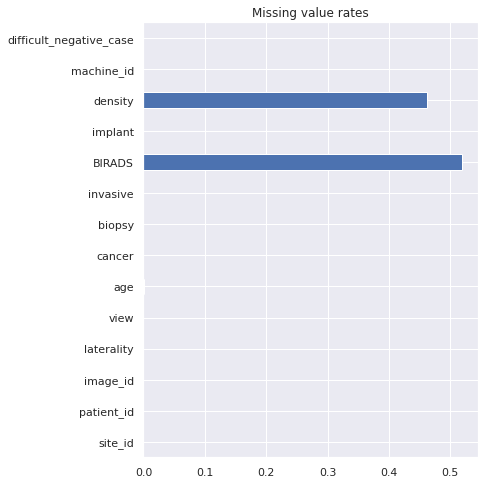

In [8]:
plt.figure(figsize=(6, 8))
train_df.isna().mean().plot(kind="barh")
plt.title("Missing value rates");

# **Metadata**

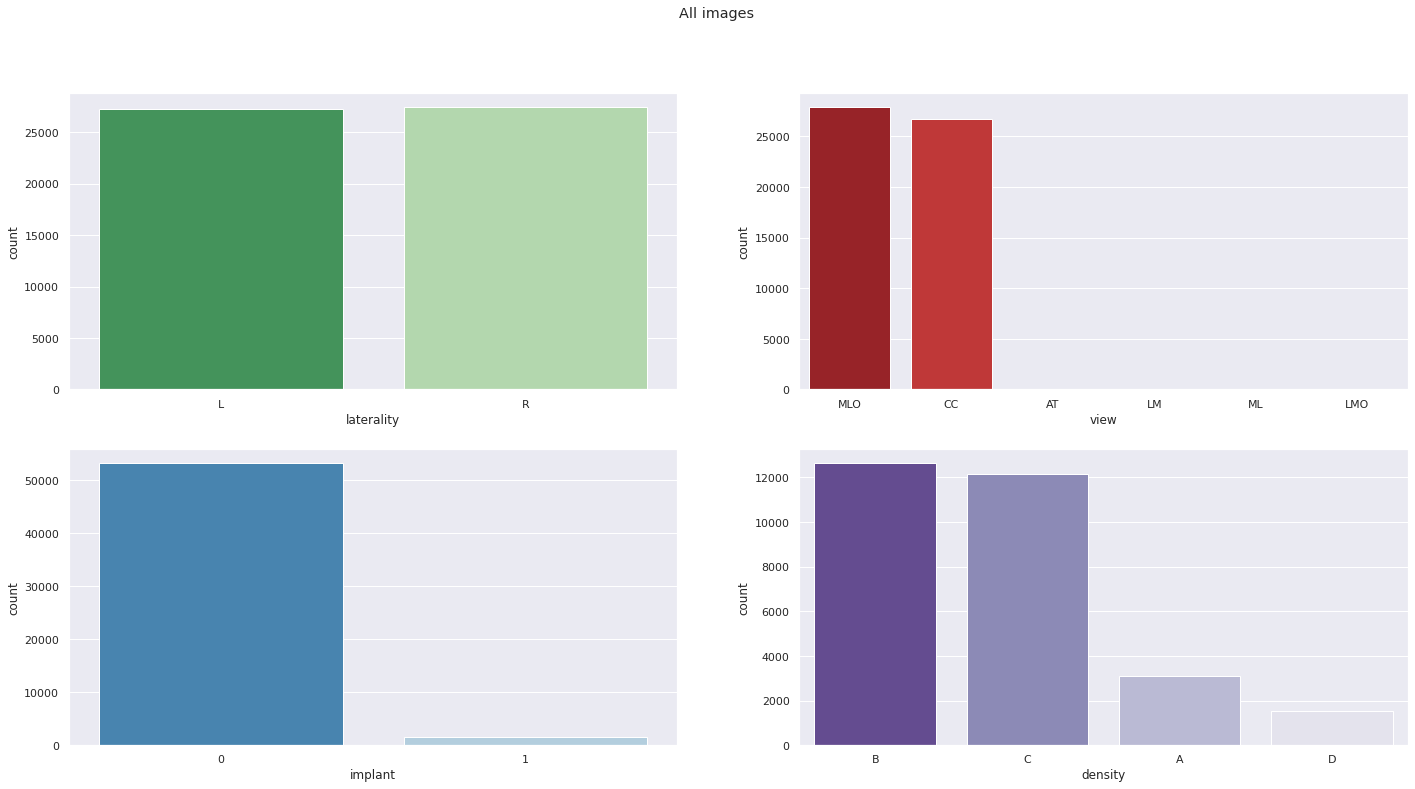

In [9]:
# source: https://www.kaggle.com/code/allunia/rsna-breast-cancer-eda
sns.set_theme()
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
axs = axs.flatten()
sns.countplot(x="laterality", data=train_df, ax=axs[0], palette="Greens_r")
sns.countplot(x="view", data=train_df, ax=axs[1], palette="Reds_r", order=train_df['view'].value_counts().index)
sns.countplot(x="implant", data=train_df, ax=axs[2], palette="Blues_r")
sns.countplot(x="density", data=train_df, ax=axs[3], palette="Purples_r", order=train_df['density'].value_counts().index)
plt.suptitle("All images");

In [10]:
train_df["view"].value_counts()

MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: view, dtype: int64

* there are quite a lot of breasts with high density, this makes cancer detection harder

#### **Mammography  views**

   reference :  https://radiopaedia.org/articles/mammography-views
1. standard views are bilateral craniocaudal (CC) and mediolateral oblique (MLO) views
2. generally, mammograms consist of 4 views: left and right CC and MLO
3. other views, i.e. ML, LM, AT and LMO are supplementary views

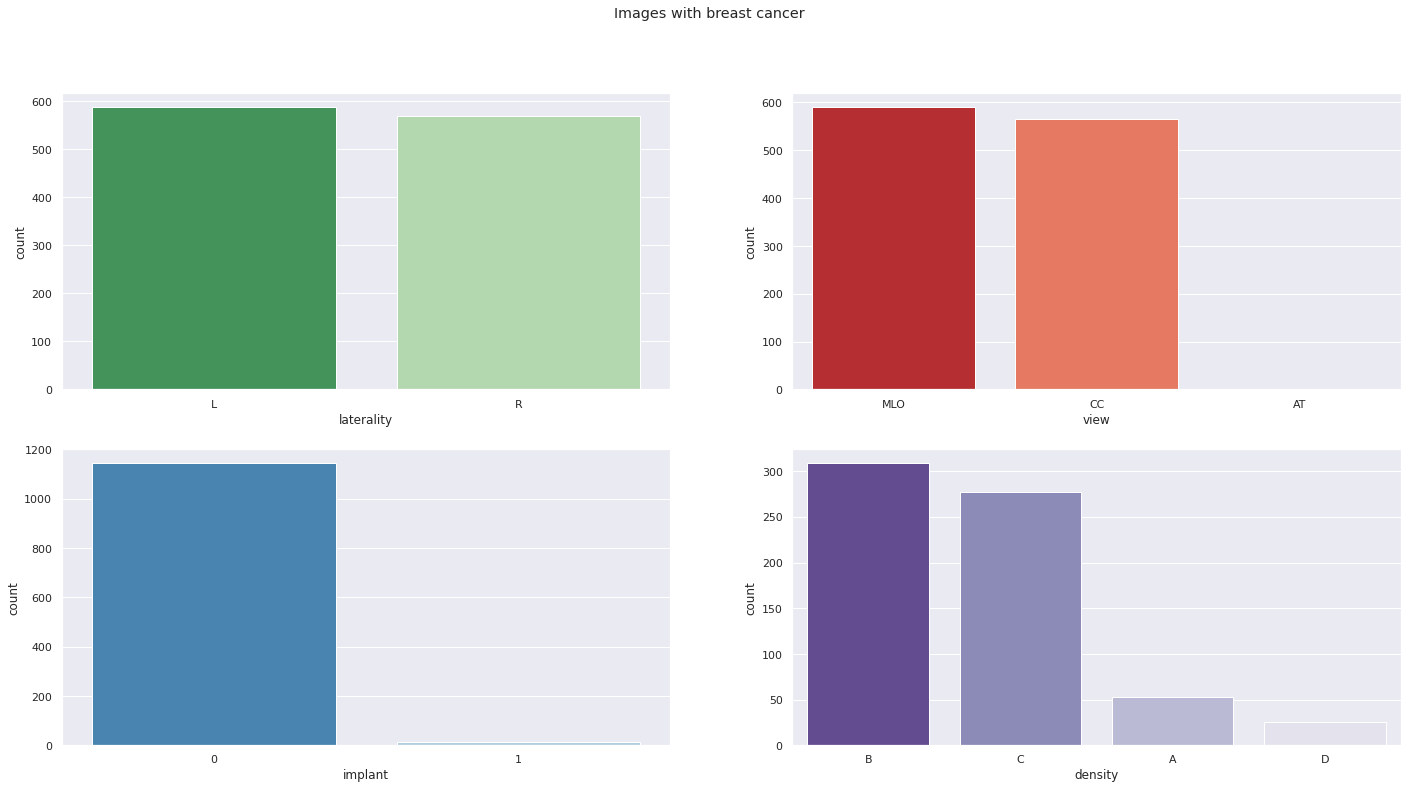

In [11]:
train_cancer_df = train_df[train_df["cancer"] == 1]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
axs = axs.flatten()
sns.countplot(x="laterality", data=train_cancer_df, ax=axs[0], palette="Greens_r")
sns.countplot(x="view", data=train_cancer_df, ax=axs[1], palette="Reds_r", order=train_cancer_df['view'].value_counts().index)
sns.countplot(x="implant", data=train_cancer_df, ax=axs[2], palette="Blues_r")
sns.countplot(x="density", data=train_cancer_df, ax=axs[3], palette="Purples_r", order=train_cancer_df['density'].value_counts().index)
plt.suptitle("Images with breast cancer");

#### **Observation** 

* distribution of metadata features for breast cancer patients show similar patterns as features for all patients in the training set

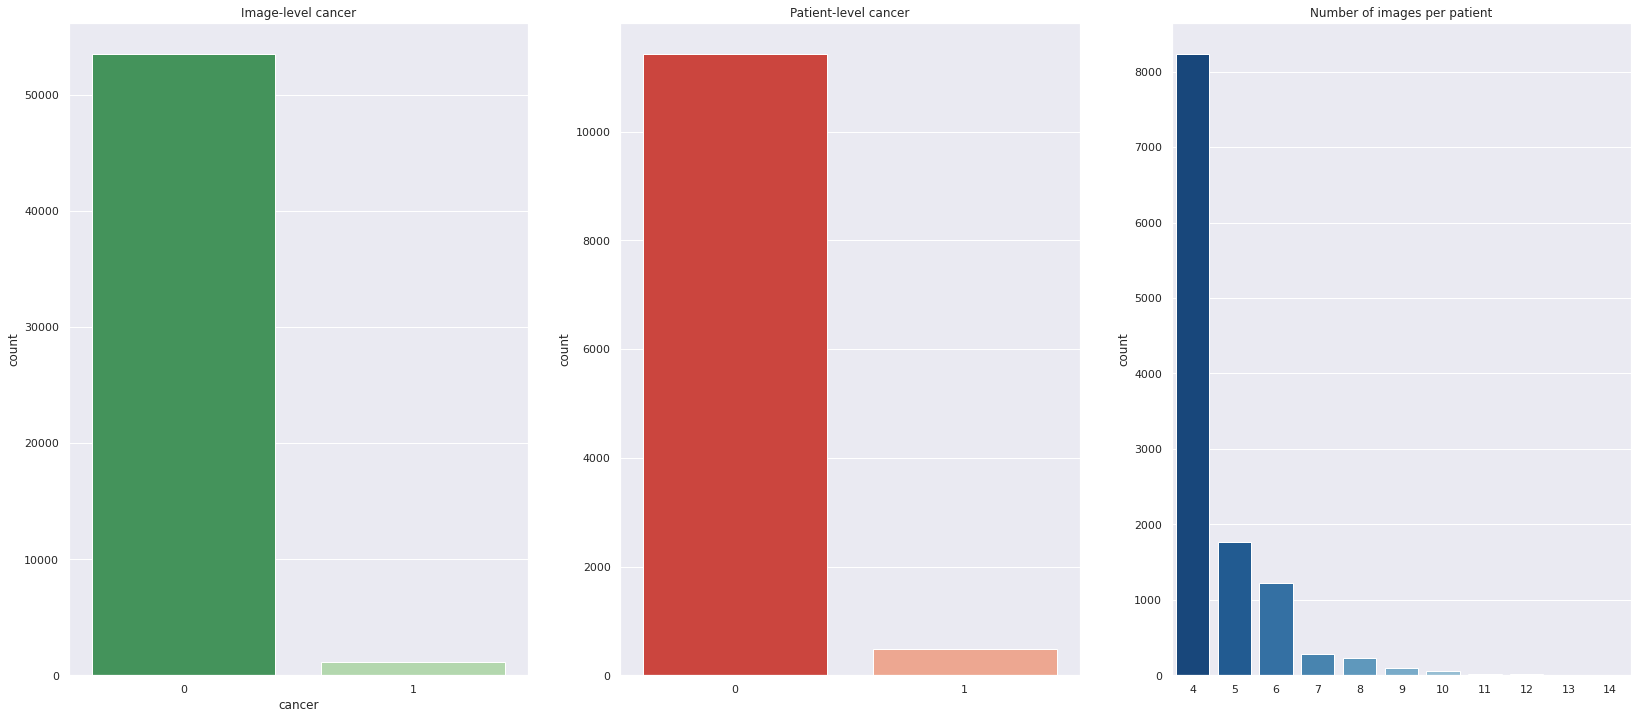

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(28, 12))
sns.countplot(x="cancer", data=train_df, ax=ax1, palette="Greens_r")
ax1.set_title("Image-level cancer")
sns.countplot(x=train_df.groupby("patient_id")["cancer"].max().to_numpy(), ax=ax2, palette="Reds_r")
ax2.set_title("Patient-level cancer")
sns.countplot(x=train_df.groupby("patient_id")["image_id"].size().to_numpy(), ax=ax3, palette="Blues_r")
ax3.set_title("Number of images per patient");

In [13]:
print(f"Correlation between number of images and cancer:")
spearmanr(train_df.groupby("patient_id")["cancer"].max().to_numpy(), train_df.groupby("patient_id")["image_id"].size().to_numpy(), nan_policy="omit")

Correlation between number of images and cancer:


SpearmanrResult(correlation=0.02902144234269669, pvalue=0.0015352890083922936)

#### **Observation**

1. huge class imbalance, both on image- and patient-level
2. most patients have the standard 4 mammography views, i.e. left and right CC and MLO
3. Spearman correlation between number of images and cancer shows very small positive association

# Based on Age

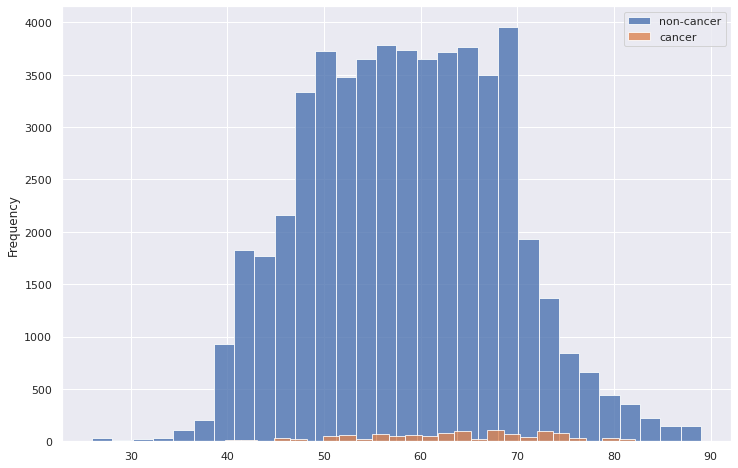

In [14]:
plt.figure(figsize=(12, 8))
train_df.loc[train_df["cancer"] == 0, "age"].plot.hist(bins=30, alpha=0.8, label="non-cancer")
train_df.loc[train_df["cancer"] == 1, "age"].plot.hist(bins=30, alpha=0.8, label="cancer")
plt.legend();

In [15]:
spearmanr(train_df["cancer"], train_df["age"], nan_policy="omit")

SpearmanrResult(correlation=0.07379896536264685, pvalue=6.841725462841372e-67)

#### **Observation**

1. patients with breast cancer are older on average than non-cancer patients
2. Spearman correlation shows a slight positive association between the two variables

# Looking Into the Images

In [16]:
def show_imgs_for_patient(patient_id: int):
    patient_dir = os.path.join(TRAIN_DIR, str(patient_id))
    img_paths = glob.glob(f"{patient_dir}/*")   
    fig, axs = plt.subplots(nrows=2, ncols=np.ceil(len(img_paths)/2).astype(int), figsize=(15,15))
    plt.suptitle(f"Number of images for patient {patient_id}: {len(img_paths)}")
    axs = axs.flatten()
    for idx, img_path in enumerate(img_paths):
        ds = pydicom.dcmread(img_path)
        axs[idx].imshow(ds.pixel_array, cmap="bone")
        axs[idx].axis("off")
        
        img_id = int(os.path.basename(img_path)[:-4])
        cancer_label = train_df.loc[train_df["image_id"] == img_id, "cancer"].values[0]
        axs[idx].set_title(f"Cancer label: {cancer_label}")

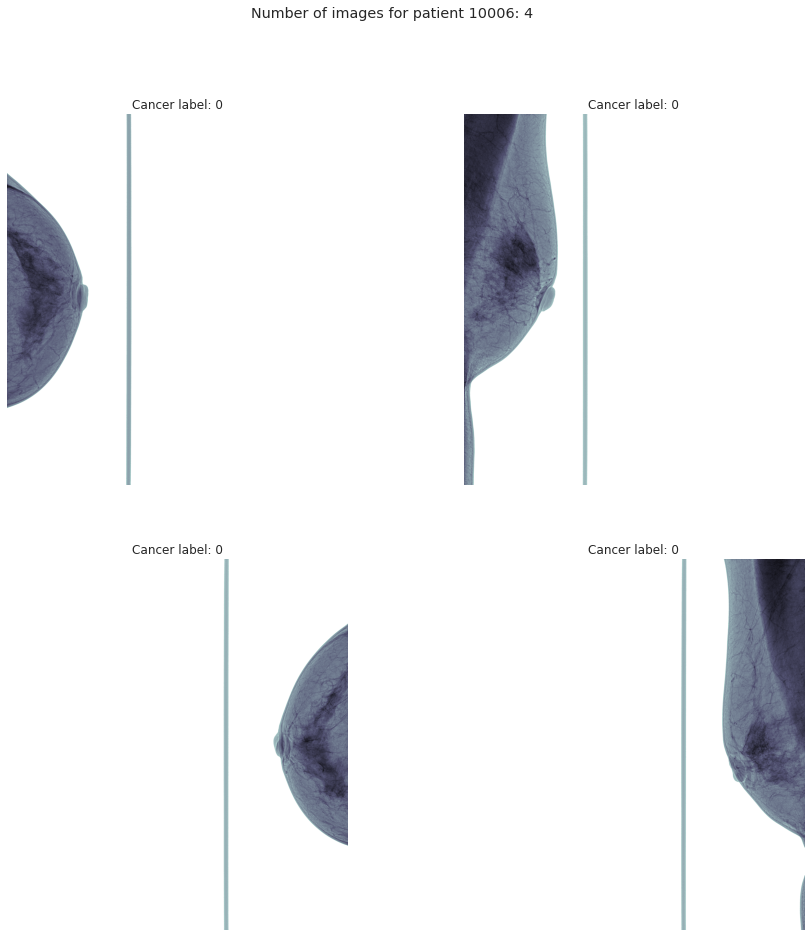

In [17]:
show_imgs_for_patient(10006)

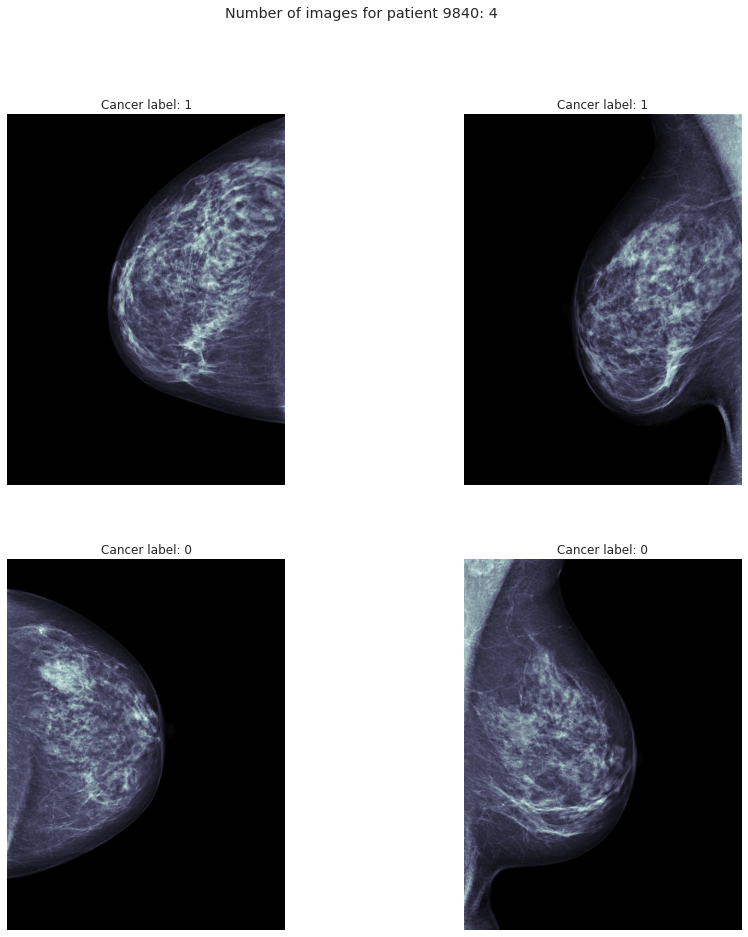

In [18]:
show_imgs_for_patient(9840)

# Difficult negative cases

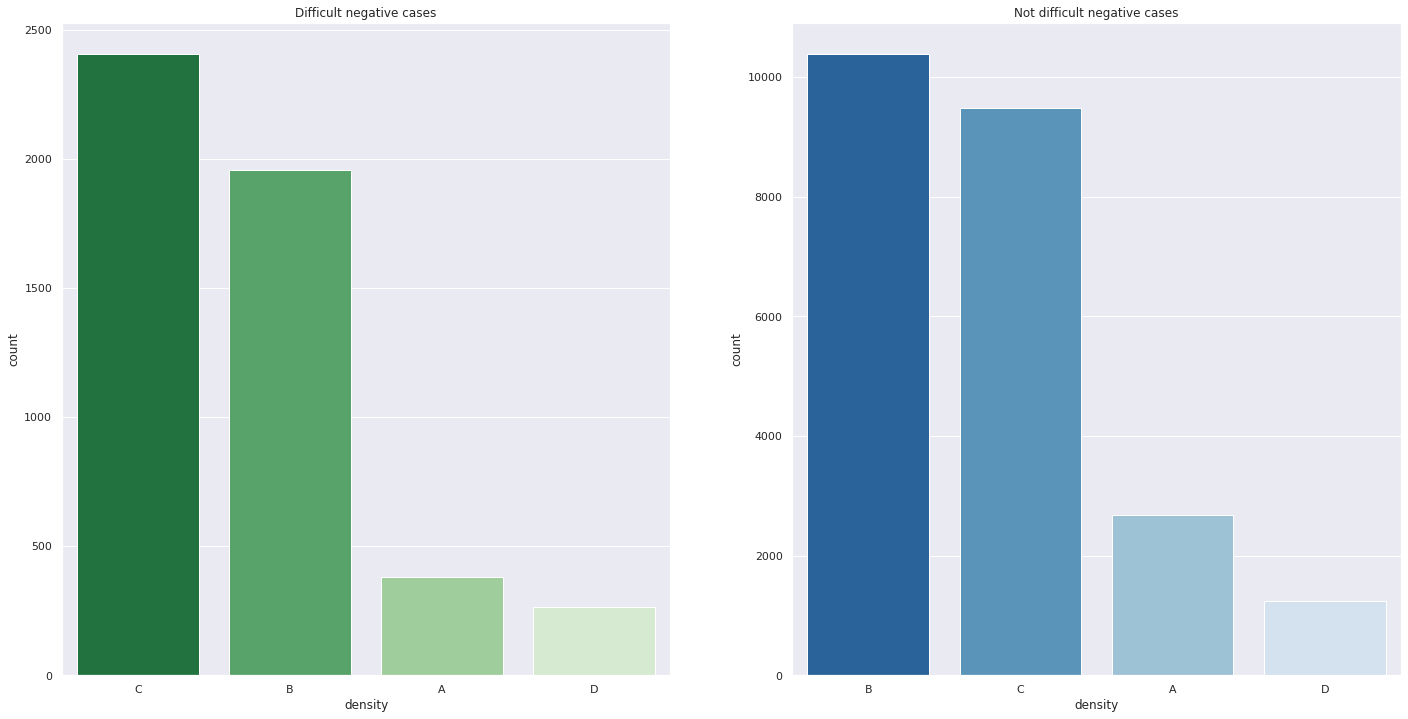

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
axs = axs.flatten()
diff_neg_df = train_df[train_df["difficult_negative_case"]]
sns.countplot(x="density", data=diff_neg_df, ax=axs[0], palette="Greens_r", order=diff_neg_df['density'].value_counts().index)
axs[0].set_title("Difficult negative cases")

not_diff_neg_df = train_df[(~train_df["difficult_negative_case"]) & (train_df["cancer"] == 0)]
sns.countplot(x="density", data=not_diff_neg_df, ax=axs[1], palette="Blues_r", order=not_diff_neg_df['density'].value_counts().index)
axs[1].set_title("Not difficult negative cases");

In [20]:
def show_diff_neg_imgs_for_patient(patient_id: int):
    patient_dir = os.path.join(TRAIN_DIR, str(patient_id))
    img_ids = train_df.loc[(train_df["patient_id"] == patient_id) & (train_df["difficult_negative_case"]), "image_id"].tolist()
    img_paths = [os.path.join(patient_dir, f"{img_id}.dcm") for img_id in img_ids]
    fig, axs = plt.subplots(nrows=1, ncols=len(img_paths), figsize=(10,10))
    plt.suptitle(f"Number of difficult negative images for patient {patient_id}: {len(img_paths)}")
    fig.tight_layout()
    axs = axs.flatten()
    for idx, img_path in enumerate(img_paths):
        ds = pydicom.dcmread(img_path)
        axs[idx].imshow(ds.pixel_array, cmap="bone")
        axs[idx].axis("off")

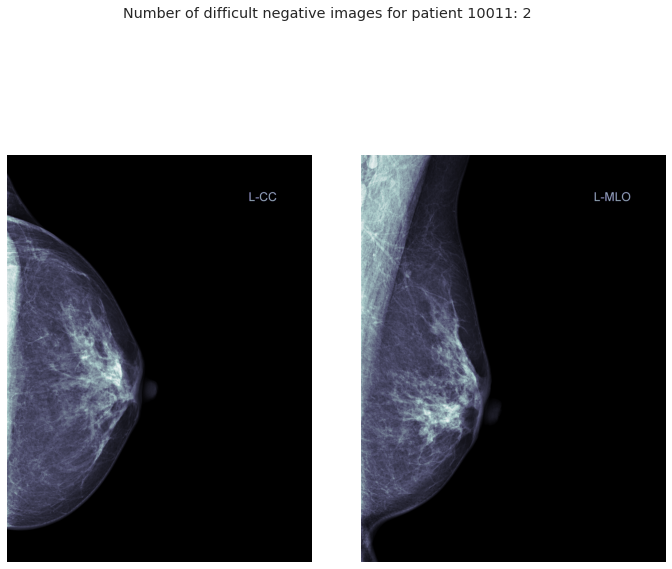

In [21]:
show_diff_neg_imgs_for_patient(10011)

#### **Observation**

* as expected, difficult negative cases have overall higher density than not difficult negatives

# Baseline submission (age normalized)

We saw that there is a weak positive relationship between age and cancer label, so let's normalize age in the test set and submit that as our predictions as a baseline.

In [22]:
test_df = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
print(test_df.shape)
test_df

(4, 9)


,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [23]:
submission_df = test_df.copy()
submission_df["age"] = submission_df["age"].fillna(submission_df["age"].median())
submission_df["cancer"] = submission_df["age"] / submission_df["age"].max()
submission_df = submission_df[["prediction_id", "cancer"]].drop_duplicates(subset="prediction_id")
submission_df

,prediction_id,cancer
0,10008_L,1.0
2,10008_R,1.0


In [24]:
submission_df.to_csv("submission.csv", index=False)

**Please upvote if you liked this notebook! Thanks for your support!**